# ALGOTHON 2021 - IMPERIAL COLLEGE LONDON

By *Daniel Plaza Herrera* and *Jonathan Sanz Carcelen*

# CHALLENGE 1: Data Cleaning Challenge

### Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from pprint import pprint as pp

import warnings
warnings.filterwarnings("ignore")


### Import dataset

In [2]:
df = pd.read_csv('data_clean.csv')
df.head()

,Series 1
0,2397.167568
1,2371.333300
2,2573.025408
3,NaN
4,2574.872476


## Raw data visualization

### Scatterplot

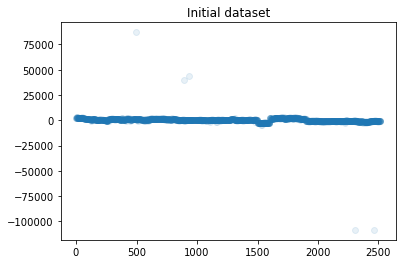

In [3]:
plt.scatter(df.index, df['Series 1'], alpha=0.1)
plt.title('Initial dataset')
plt.show()

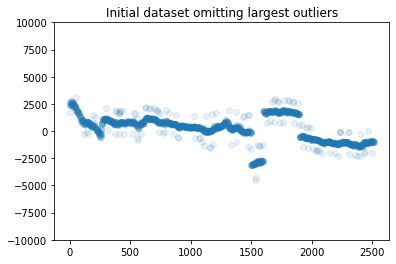

In [4]:
plt.scatter(df.index, df['Series 1'], alpha=0.1)
plt.ylim([-10000, 10000])
plt.title('Initial dataset omitting largest outliers')
plt.show()

### Data distribution

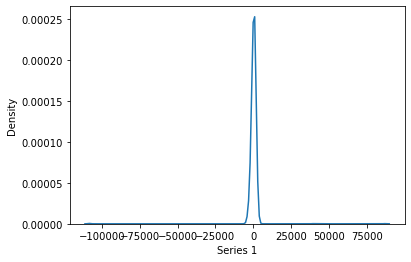

In [5]:
plt.figure()
sns.kdeplot(df['Series 1'])
plt.show()

## Cleaning proposal
- Visual clustering of 4 clusters of data to be realigned
- Detection of outliers by comparing its distance to the moving average. After several trials, moving average of 10 days best adjusted to the dataset
- Move clusters and outliers to main tendency of dataset

## First adjustment of outliers

In [6]:
window_size = 10
mean = df.mean().to_numpy()
std = df.std().to_numpy()

def create_moving_average(window_size, df, column):
    windows = df[column].rolling(window_size, min_periods=1)
    col_name = 'avg_10'
    df[col_name] = windows.mean()
create_moving_average(window_size, df=df, column='Series 1')

df['new'] = 0

outliers_ind = []
outliers_ind_aux = []
for i in range(len(df)):
    if abs(df['Series 1'].iloc[i]) > (mean + 1*std):
        outliers_ind.append(i)    
        outliers_ind_aux.append(i - 20)
        
df['Series 1 aux'] = df['Series 1']
df['Series 1 aux'].iloc[outliers_ind] = df['avg_10'].iloc[outliers_ind_aux]


### Data visualization

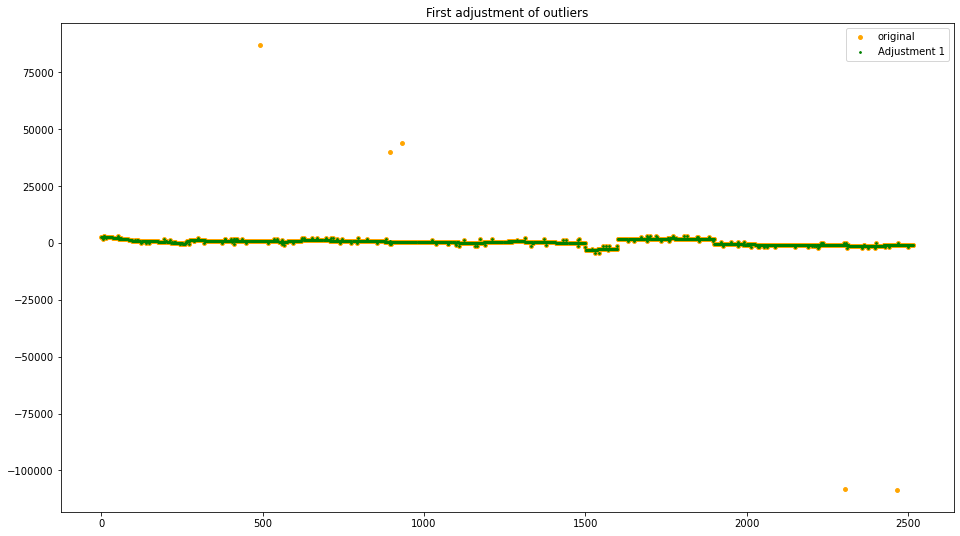

In [7]:
plt.figure(figsize=(16,9))
plt.title('First adjustment of outliers')
plt.scatter(df.index, df['Series 1'], label='original', c='orange', s=15)
plt.scatter(df.index, df['Series 1 aux'], label='Adjustment 1', c='green', s=3)
plt.legend()

## Second adjustment of outliers

In [8]:
df1 = df.iloc[0:1499,:]
df2 = df.iloc[1500:1599,:]
df3 = df.iloc[1600:1899,:]
df4 = df.iloc[1900:-1,:]

df_list = [df1, df2, df3, df4]

for i in df_list:
    def create_moving_average(window_size, df, column):
        windows = df[column].rolling(window_size, min_periods=5)
        col_name = 'avg_10'
        df[col_name] = windows.mean()
    create_moving_average(window_size, df=i, column='Series 1 aux')

df_concat = pd.concat(df_list) 
df = df_concat
    
for i in range(len(df)):
    np_type = type(df['avg_10'].iloc[0])
    k = i
    threshold = 10^6
        
    if i in range(1500,1600):
        while type(df['avg_10'].iloc[k]) != np_type:
            k = k + 1
        avg = df['avg_10'].iloc[k]
        
        if (df['Series 1 aux'].iloc[i] - avg)**2 > threshold:
            df['new'].iloc[i] = avg
        else:
            df['new'].iloc[i] = df['Series 1'].iloc[i]
        
    if i in range(1600,1900):
        while type(df['avg_10'].iloc[k]) != np_type:
            k = k + 1
        avg = df['avg_10'].iloc[k]
        
        if (df['Series 1 aux'].iloc[i] - avg)**2 > threshold:
            df['new'].iloc[i] = avg
        else:
            df['new'].iloc[i] = df['Series 1'].iloc[i]
            
    else:
        try:
            while type(df['avg_10'].iloc[k]) != np_type:
                k = k + 1
            avg = df['avg_10'].iloc[k]

            if (df['Series 1 aux'].iloc[i] - avg)**2 > threshold:
                df['new'].iloc[i] = avg 
            else:
                df['new'].iloc[i] = df['Series 1'].iloc[i]
        except: 
            pp('error in {:}'.format(i))
            continue


### Data visualization

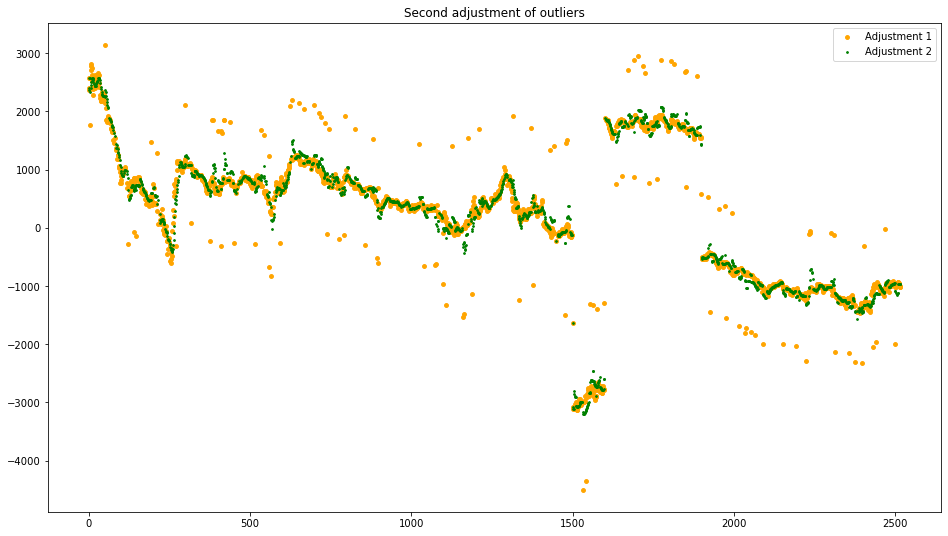

In [9]:
plt.figure(figsize=(16,9))
plt.title('Second adjustment of outliers')
plt.scatter(df.index, df['Series 1 aux'], label='Adjustment 1', c='orange', s=15)
plt.scatter(df.index, df['new'], label='Adjustment 2', c='green', s=3)
plt.legend()

## Alignemnt of clusters

In [10]:
step1 = df['new'].iloc[1503] - df['avg_10'].iloc[1498]
step2 = df['new'].iloc[1901] - df['avg_10'].iloc[1597]
for i in range(len(df)):
    if i in range(1500,1598):
        df['new'].iloc[i] = df['new'].iloc[i] - step1
    if i in range(1598,1897):
        df['new'].iloc[i] = df['new'].iloc[i] - step2
        
df['new'] = df['new'].interpolate()

### Data visualization

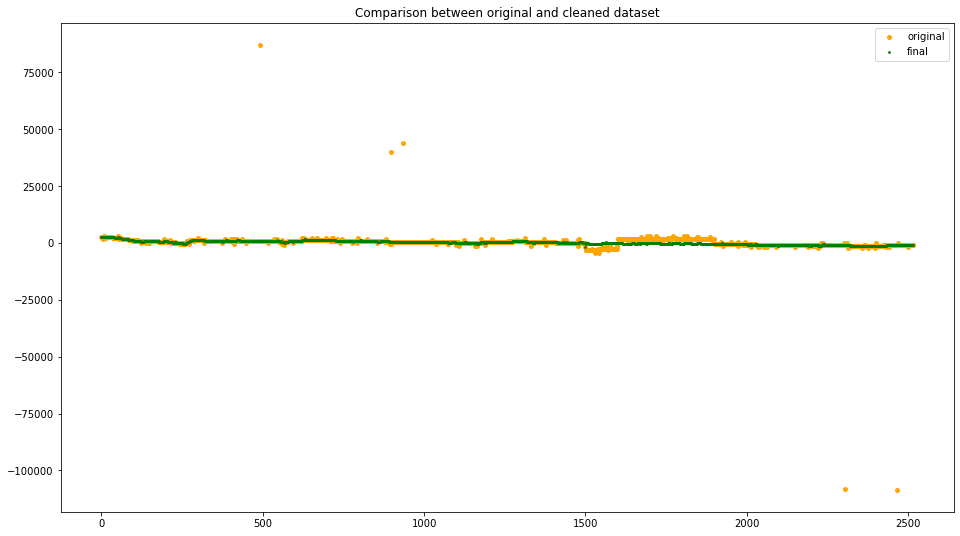

In [11]:
plt.figure(figsize=(16,9))
plt.scatter(df.index, df['Series 1'], label='original', c='orange', s=15)
plt.scatter(df.index, df['new'], label='final', c='green', s=3)
plt.title('Comparison between original and cleaned dataset')
plt.legend()

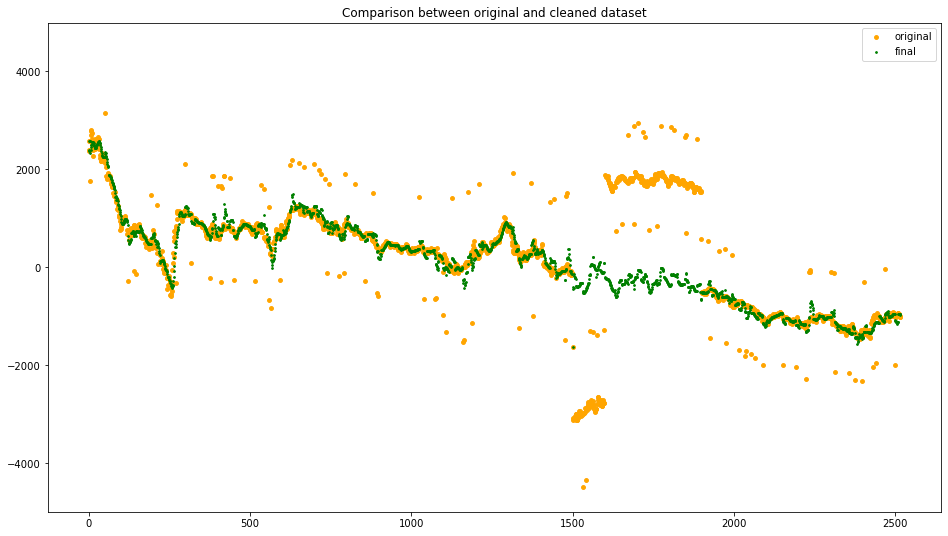

In [12]:
plt.figure(figsize=(16,9))
plt.scatter(df.index, df['Series 1'], label='original', c='orange', s=15)
plt.scatter(df.index, df['new'], label='final', c='green', s=3)
plt.title('Comparison between original and cleaned dataset')
plt.ylim([-5000,5000])
plt.legend()

## Save clean dataset

In [13]:
df['new'].to_csv('RAZZ99_data_cleaning.csv', index=False, header='Series 1')
df['new'].head()

0    2397.167568
1    2371.333300
2    2573.025408
3    2573.948942
4    2574.872476
Name: new, dtype: float64